NH3 Preprocessing

In [1]:
import sys
sys.path.append('..')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from utils import filters, plots

In [2]:
# Load the NETCDF dataset
nh3_nc = xr.load_dataset('../../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

In [3]:
# Bounding box
lat_bounds = slice(44.75, 46.65)
lon_bounds = slice(8.5, 11.25)

In [4]:
time_sliced = slice('2000-01-15T00:00:00.000000000','2020-12-15T00:00:00.000000000')

In [5]:
# Load the NH3 layer in the region specified by the bounding box
nh3 = nh3_nc.agl.sel(time=time_sliced, lat=lat_bounds, lon=lon_bounds)
nh3.head(2)

<xarray.DataArray 'agl' (time: 2, lat: 2, lon: 2)>
array([[[1.2637793e-06, 1.7954435e-06],
        [5.2595988e-06, 3.4429331e-06]],

       [[1.2786895e-06, 1.8166266e-06],
        [5.3216527e-06, 3.4835534e-06]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44.75 44.85
  * lon      (lon) float32 8.55 8.65
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15
Attributes:
    units:             Tg yr-1
    sector_name:       Agriculture livestock (mma)
    standard_name:     tendency_of_atmosphere_mass_content_of_nh3_due_to_emis...
    cell_method:       time: sum (interval: 1 year comment: gregorian calendar) 
    molecular_weight:  17.0
    long_name:         Emissions of nh3 for agl sectors

In [6]:
# Load the shapefile
shape = gpd.read_file('../../resources/regione/regione_2015.shp')
shape.head()

CODICE               NOME    SHAPE_AREA     SHAPE_LEN  \
0     03  REGIONE LOMBARDIA  2.386795e+10  1.535219e+06   

                                            geometry  
0  MULTIPOLYGON (((460668.530 5015498.348, 460677...

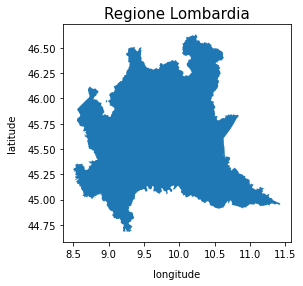

In [7]:
plots.plot_shapefile(shape, epsg=4326, title='Regione Lombardia', xlabel='longitude', ylabel='latitude')

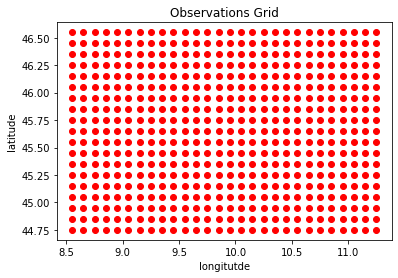

<Figure size 432x288 with 0 Axes>

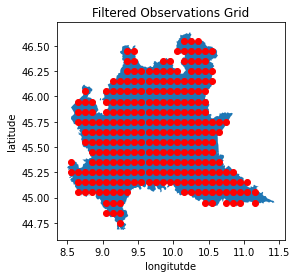

In [8]:
# Filter the time series inside the shapefile
data = filters.filter_data_on_shapefile(nh3, lats = nh3.lat, lons = nh3.lon, shp=shape, epsg=4326, plot_grid=True, plot_filter=True)

In [9]:
lats = nh3.lat.to_series().tolist()
lons = nh3.lon.to_series().tolist()
times = nh3.time.to_series().tolist()

filtered_nh3 = xr.DataArray(data, coords=[times, lats , lons], dims=['time', 'lat', 'lon'])   
filtered_nh3.attrs = nh3.attrs

In [10]:
filtered_nh3_dataset = xr.Dataset(
    {
    'agl': (['time', 'lat', 'lon'], data)
    },
    coords = {
        'time': times,
        'lat': lats,
        'lon': lons
    }
)

In [11]:
filtered_nh3_dataset.to_netcdf('../../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc')